# Regresi

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# Load dataset
data = pd.read_csv('R04_corruptions.csv')
data.columns = ['Corruption_Perception', 'Government_Transparency']

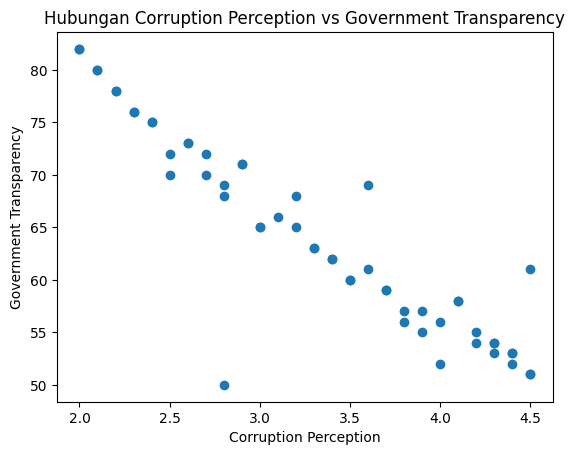

In [3]:
# Scatter plot awal
plt.scatter(data.Corruption_Perception, data.Government_Transparency)
plt.xlabel('Corruption Perception')
plt.ylabel('Government Transparency')
plt.title('Hubungan Corruption Perception vs Government Transparency')
plt.show()

In [4]:
# Korelasi
print("Korelasi antar variabel:")
print(data.corr())

Korelasi antar variabel:
                         Corruption_Perception  Government_Transparency
Corruption_Perception                 1.000000                -0.920063
Government_Transparency              -0.920063                 1.000000


In [5]:
# Siapkan data untuk training
x = np.array(data.Corruption_Perception, dtype=np.float32).reshape(-1, 1)
y = np.array(data.Government_Transparency)

In [6]:
# Buat model regresi
model = LinearRegression()
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


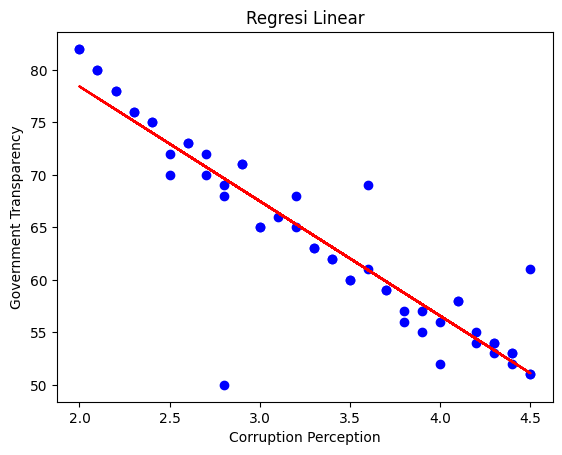

In [8]:
# Plot garis regresi
plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(x), color='red')
plt.xlabel('Corruption Perception')
plt.ylabel('Government Transparency')
plt.title('Regresi Linear')
plt.show()

In [9]:
# Intercept dan slope
print(f'Intercept: {model.intercept_}')
print(f'Slope: {model.coef_[0]}')

Intercept: 100.27174377441406
Slope: -10.923285484313965


In [10]:
# Prediksi untuk contoh nilai
x_test = np.array([2.5, 3.0, 3.5, 4.0, 4.5]).reshape(-1, 1)
prediksi = model.predict(x_test)
print("Prediksi Government Transparency untuk nilai Corruption Perception:", prediksi)

Prediksi Government Transparency untuk nilai Corruption Perception: [72.96353006 67.50188732 62.04024458 56.57860184 51.1169591 ]


In [14]:
# Evaluasi model
r_squared = r2_score(y, model.predict(x))
mse = mean_squared_error(y, model.predict(x))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, model.predict(x))

print(f"R-squared: {r_squared}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R-squared: 0.8465156555175781
MSE: 13.073616027832031
RMSE: 3.6157455701185657
MAE: 2.078798770904541


# Klasifikasi Naive Bayes

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Load dataset
data = pd.read_csv('K02_diabetes.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [17]:
# Encode kolom kategorikal
categorical_cols = ['gender', 'smoking_history']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [18]:
# Pisahkan fitur dan target
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [19]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Buat model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [21]:
# Prediksi
y_pred = model.predict(X_test)

In [23]:
# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model Naive Bayes: {accuracy:.4f}")

Akurasi model Naive Bayes: 0.9048


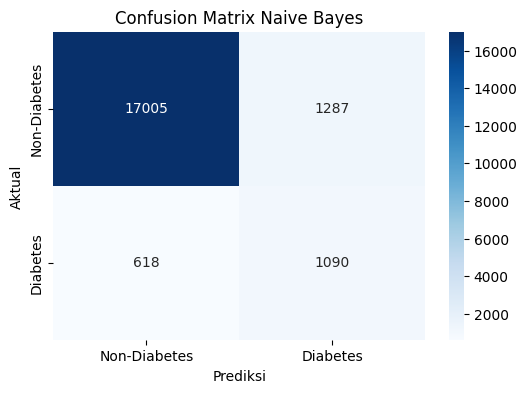

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetes','Diabetes'], yticklabels=['Non-Diabetes','Diabetes'])
plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()